<a href="https://colab.research.google.com/github/jramire77468/ML2/blob/main/ML2_Actividad2_JuanRamirez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning II
# Actividad 2
## Juan Felipe Ramírez Botero

## 1. Parte Teórica

### 1.1 ¿Qué es una red neuronal artificial? Describe brevemente sus componentes principales (neuronas, pesos, funciones de activación, capas).

Una red neuronal artificial es un modelo computacional que se asemeja a la estructura y el funcionamiento del cerebro humano para el procesamiento de información. Se utilizan para resolver problemas de clasificación, reconocimiento de patrones o predicción.
Estos modelos "aprenden" ajustando sus parámetros internos y son muy populares debido a que pueden resolver los problemas mencionados sin tener que ser programados explícitamente para cada tarea.

Sus componentes principales son:
- Neuronas o Nodos: Son las unidades de procesamiento. Cada neurona recibe una o varias entradas a las cuales les hace una operación y aplica una función de activación para generar una salida.
- Pesos: Son valores que se asignan a cada conexión entre neuronas y se utilizan en las sumas ponderadas que realizan las neuronas.
- Sesgos: Son valores adicionales que se añaden o se restan del resultado de la suma ponderada que hace la neurona antes de la función de activación y sirven para que la neurona pueda alterar su umbral de activación.  
- Funciones de Activación: Son funciones matemáticas que se aplican a la salida de cada neurona que introducen no linealidad para permitir el proceso de aprendizaje. Algunas comunes son Sigmoid, Tanh y ReLU.
- Capas: Las neuronas se organizan en capas de la siguiente forma:
  - a. Capa de entrada: Recibe los datos en bruto y no tiene pesos ni sesgos.
  - b. Capas ocultas: Son las capas donde ocurre la mayoría del procesamiento. En ellas, cada neurona recibe la salida de cada neurona de la capa anterior y le asigna un peso, procesa la suma ponderada, introduce un sesgo y aplica la función de activación para entregar una salida a la siguiente capa.
  - c. Capa de salida: Da el resultado final del modelo y en ella se aplica una función de activación dependiendo del tipo de problema que se busca resolver.

### 1.2 Explica qué es el algoritmo de backpropagation y por qué es importante en el entrenamiento de redes.

El algoritmo de backpropagation o retropropagación en español es el proceso iterativo que permite el aprendizaje en las redes neuronales y funciona de la siguiente manera:
Primero se da la propagación hacia adelante en que la información de la capa de entrada es procesada por la red hasta obtener una salida que inicialmente puede ser diferente a la salida deseada. El proceso de "aprendizaje" por parte del modelo inicia con la cuantificación del error, o bien de la distancia entre la salida deseada y la salida actual del modelo. Luego inicia la retropropagación en que se ajustan los pesos y sesgos según la responsabilidad calculada de cada uno de ellos en el error para poder minimizarlo en la siguiente iteración.

Ahí yace su importancia, pues es debido al algoritmo de retropropagación que los modelos de redes neuronales se optimizan y minimizan su error para mejorar su rendimiento.

### 1.3 Describe al menos tres funciones de activación comunes y menciona cuándo conviene utilizar cada una (ReLU, sigmoide, tanh).

- 1. ReLU: Esta función devuelve 0 si el valor es negativo y si el valor de entrada es positivo, devuelve el mismo valor. Se utiliza como función de activación para capas ocultas por defecto por su eficiencia computacional y porque evita el problema del desvanecimiento del gradiente.
- 2. Sigmoide: Esta función convierte cualquier valor de entrada a un número entre 0 y 1 y tiene una forma de s suave. Se utiliza como capa de salida para problemas de clasificación binaria.
- 3. Tanh: Esta función tiene una forma similar a la sigmoide pero convierte los valores de entrada a números entre -1 y 1. Se utiliza como capa oculta en redes neuronales recurrentes o como capa de salida en problemas de clasificación binaria con datos simétricos en donde los datos positivos y negativos requieren la misma representación.

## 2. Parte Práctica

### 2.1 Carga del Dataset

In [1]:
# importar librerías
import pandas as pd
# importar archivo

df = pd.read_csv('/creditcard.csv')

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 2.2 Preprocesamiento

In [2]:
# verificar nulos
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [3]:
# verificar tipos de datos
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [4]:
# verificar balance de clases
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Hay un enorme desbalance entre las clases en donde las transacciones normales superan alrededor de 577:1 a las transacciones fraudulentas. Esto es problemático porque si el modelo simplemente predice que todas las transacciones son legítimas, estaría en lo correcto el 99,8% de las veces.

Algunas de las formas en que se puede manejar este desbalance pueden ser por muestreo como por ejemplo tomar una muestra menor de la clase mayoritaría, artificialmente aumentar el número de registros de la clase minoritaria o una combinación de las dos. Otra forma de manejarla sin alterar los datos de entrada es a partir de los pesos de clase que se pueden configurar en los modelos para dar un mayor peso a la clase minoritaria. Otra forma de manejarlos es mediante el uso de  métricas de evaluación diferentes a accuracy como precision, recall y f-1 score.

### 2.3 Modelo base con Keras

In [5]:
# importar librerías para estandarización y división de grupos
# de entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar variable objetivo
X = df.drop("Class", axis=1)
y = df["Class"]

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [9]:
# importar librerías para crear el modelo
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# modelo inicial
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])
# compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[
                  'accuracy',
                  tf.keras.metrics.AUC(name='auc'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall')
              ])
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=2048, validation_split=0.2)

# Evaluación sobre el conjunto de prueba
results = model.evaluate(X_test, y_test, verbose=0)
metrics_names = model.metrics_names

# Imprimir resultados
for name, value in zip(metrics_names, results):
    print(f"{name}: {value:.4f}")

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8367 - auc: 0.1224 - loss: 0.4681 - precision: 5.4323e-04 - recall: 0.0485 - val_accuracy: 0.9959 - val_auc: 0.1203 - val_loss: 0.2110 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9975 - auc: 0.1513 - loss: 0.1734 - precision: 0.0048 - recall: 0.0011 - val_accuracy: 0.9983 - val_auc: 0.6997 - val_loss: 0.0908 - val_precision: 1.0000 - val_recall: 0.0843
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9985 - auc: 0.7133 - loss: 0.0785 - precision: 0.8790 - recall: 0.2544 - val_accuracy: 0.9989 - val_auc: 0.8692 - val_loss: 0.0478 - val_precision: 0.8889 - val_recall: 0.4819
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9990 - auc: 0.8182 - loss: 0.0430 - precision: 0.8283 - recall: 0.4495 - val_accuracy: 0.9991 - val_auc: 0.8928 - val_loss: 0.0296 - val_precision: 0.8846 - val_recall: 0.5542
Epoch 5/10
90/90 ━━━━━━━━━━

Resumen al final de la época 10:
- Accuracy: 0.9993. Este alto porcentaje de exactitud era de esperarse por el desbalance de clases como se explicó en un punto anterior.
- AUC: 0.9147. Alta capacidad para distinguir entre clases.
- precision: 0.8923. Pocos falsos positivos
- recall: 0.6988. Detecta cerca de 7 de cada 10 fraudes correctamente.



### 2.4 Visualización

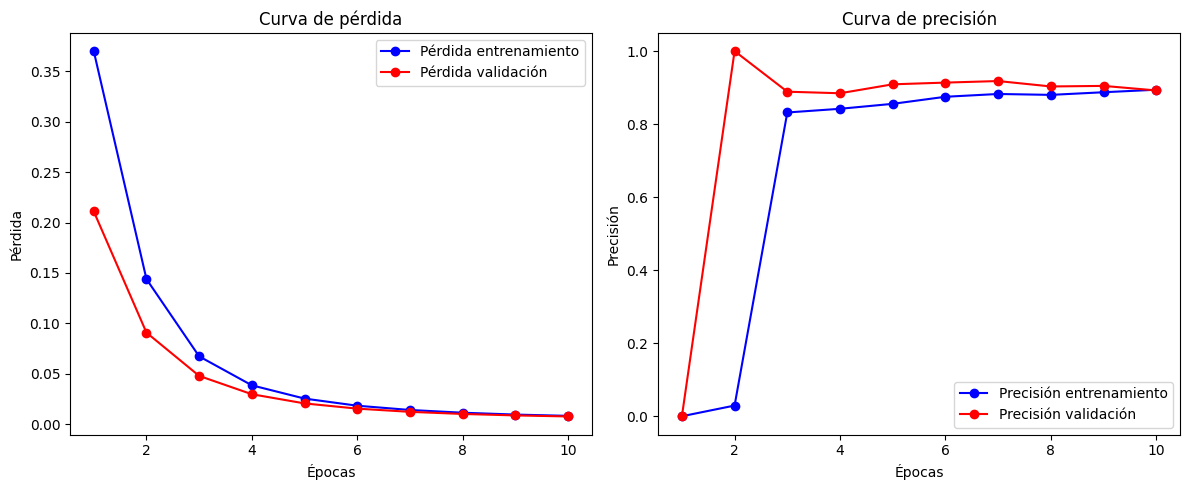

In [10]:
# importar matplotlib para crear la gráfica de la curva de pérdida
import matplotlib.pyplot as plt

# Extrae métricas del historial
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']

epochs = range(1, len(loss) + 1)

# Curva de pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Pérdida entrenamiento')
plt.plot(epochs, val_loss, 'ro-', label='Pérdida validación')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Curva de precisión
plt.subplot(1, 2, 2)
plt.plot(epochs, precision, 'bo-', label='Precisión entrenamiento')
plt.plot(epochs, val_precision, 'ro-', label='Precisión validación')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

- Curva de pérdida: Tanto para el conjunto de entrenamiento como para el de validación, la tendencia es descendente para cada época. Hay una diferencia pequeña entre las dos que no muestra sobreajuste.
- Curva de precisión (precision no accuracy): A partir de la época 3 se minimizan las diferencias entre la curva de precisión de entrenamiento y validación. El modelo alcanza un buen nivel de precisión con pocos falsos positivos.

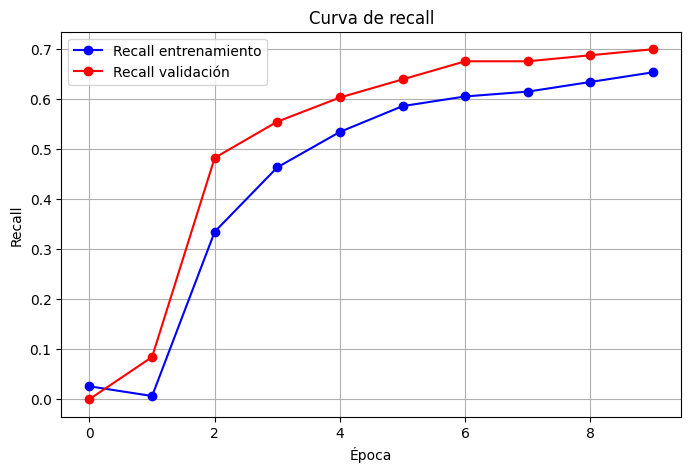

In [11]:
# Graficar curva de recall
plt.figure(figsize=(8, 5))
plt.plot(history.history['recall'], label='Recall entrenamiento', marker='o', color='blue')
plt.plot(history.history['val_recall'], label='Recall validación', marker='o', color='red')
plt.title('Curva de recall')
plt.xlabel('Época')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)
plt.show()

- Gráfica de recall: Nuevamente se ve una ausencia de señales de overfitting. El modelo un buen nivel de identificación de fraudes (cerca de 7/10)

### 2.5 Reto adicicional - Regularización

In [14]:
# modelo con dropout y l2
from keras.layers import Dropout
from keras import regularizers

model2 = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['Precision', 'Recall'])

history2 = model2.fit(X_train, y_train,
                      epochs=10,
                      batch_size=2048,
                      validation_split=0.2)

# evaluar modelo
results2 = model2.evaluate(X_test, y_test)
print(f"Loss: {results2[0]:.4f}")
print(f"Precision: {results2[1]:.4f}")
print(f"Recall: {results2[2]:.4f}")

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - Precision: 0.0024 - Recall: 0.0310 - loss: 0.2730 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_loss: 0.0896
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - Precision: 0.9180 - Recall: 0.1497 - loss: 0.0888 - val_Precision: 0.8649 - val_Recall: 0.3855 - val_loss: 0.0668
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Precision: 0.8590 - Recall: 0.3054 - loss: 0.0665 - val_Precision: 0.8814 - val_Recall: 0.6265 - val_loss: 0.0523
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Precision: 0.8675 - Recall: 0.5059 - loss: 0.0523 - val_Precision: 0.8923 - val_Recall: 0.6988 - val_loss: 0.0418
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Precision: 0.8964 - Recall: 0.5276 - loss: 0.0418 - val_Precision: 0.8906 - val_Recall: 0.6867 - val_loss: 0.0337
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Precision: 0.8957 - Recall: 0.5130 - loss: 0.0339 - val_Precision: 0.8923 - val_Recall: 0.6988 - val_loss: 0

El modelo con regularización tiene una pérdida mayor (0.0127 con reg vs 0.0077 sin reg) y un recall más alto (0.7349 con reg vs 0.6988 sin reg) lo que indica que el modelo con regularización es mejor en la detección de fraudes reales.

# Juan Felipe Ramírez